In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from helpers import *

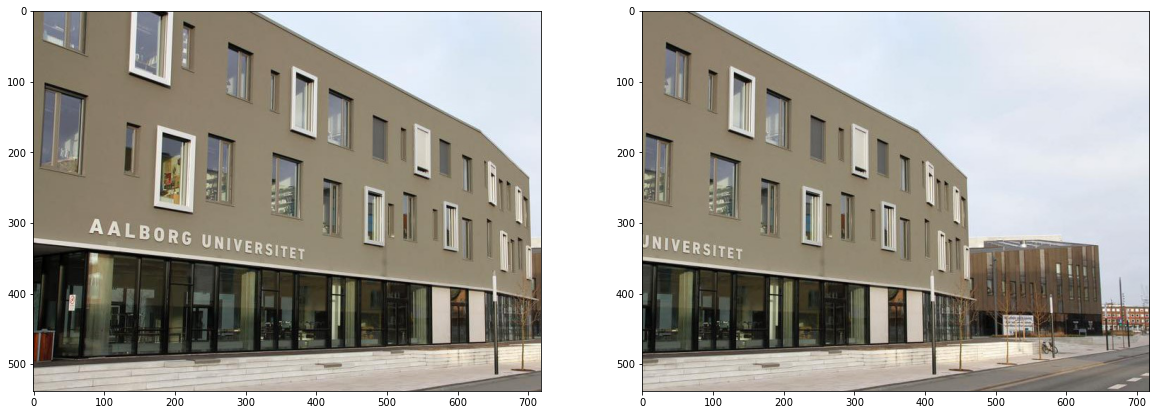

In [2]:
image1 = cv2.imread('../Images/aau-city-1.jpg')
image2 = cv2.imread('../Images/aau-city-2.jpg')

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(image1)
ax[1].imshow(image2)

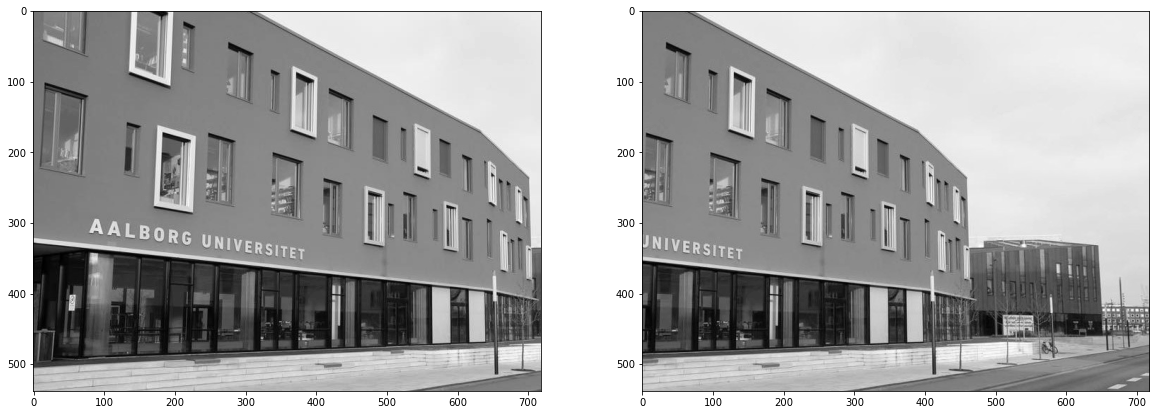

In [3]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(image1_gray, cmap='gray')
ax[1].imshow(image2_gray, cmap='gray')

In [4]:
def detect_harris_corners(image, block_size=2, kernel_size=3, k=0.04):
    # Step 1: Color to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Step 2: Spatial derivative calculation (gradient in x and y direction)
    Ix = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=kernel_size)
    Iy = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=kernel_size)
    
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy
    
    # Step 3: Windowing the image and calculating the sum of the squared gradients
    harris_image = np.zeros(gray_image.shape)
    offset = block_size // 2
    
    for x in range(offset, harris_image.shape[0] - offset):
        for y in range(offset, harris_image.shape[1] - offset):
            Sxx = np.sum(Ixx[x - offset:x + offset + 1, y - offset:y + offset + 1])
            Syy = np.sum(Iyy[x - offset:x + offset + 1, y - offset:y + offset + 1])
            Sxy = np.sum(Ixy[x - offset:x + offset + 1, y - offset:y + offset + 1])
            
            # Step 4: Structure tensor setup
            M = np.array([[Sxx, Sxy],
                          [Sxy, Syy]])
            
            # Step 5: Harris response calculation
            R = np.linalg.det(M) - k * (np.trace(M) ** 2)
            harris_image[x, y] = R
    

    # Step 6: Non-maximum suppression
    # TODO implement non-maximum suppression
    
    return harris_image
    

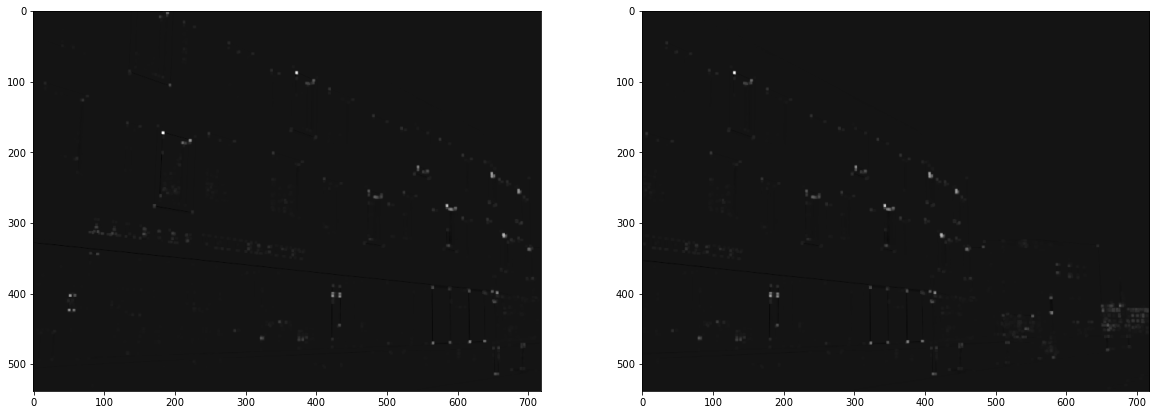

In [5]:
BLOCK_SIZE = 2
KERNEL_SIZE = 3
K = 0.04

harris1 = detect_harris_corners(image1, BLOCK_SIZE, KERNEL_SIZE, K)
harris2 = detect_harris_corners(image2, BLOCK_SIZE, KERNEL_SIZE, K)

harris1 = cv2.dilate(harris1, None)
harris2 = cv2.dilate(harris2, None)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(harris1, cmap='gray')
ax[1].imshow(harris2, cmap='gray')

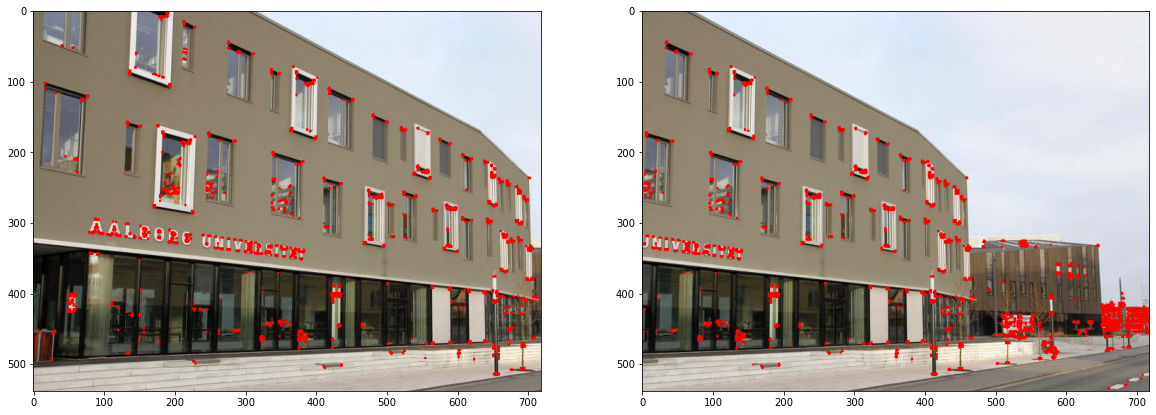

In [6]:
T = 0.01

image_harris1 = image1.copy()
image_harris2 = image2.copy()

image_harris1[harris1 > T * harris1.max()] = [255, 0, 0]
image_harris2[harris2 > T * harris2.max()] = [255, 0, 0]

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(image_harris1)
ax[1].imshow(image_harris2)